<a href="https://colab.research.google.com/github/GodaBac/BachelorThesis/blob/main/Isolation%20Forest/IsolationForest_with_standardized_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
from datetime import datetime

input_file_path = '/content/drive/MyDrive/Bakalauras/duomenys.csv'

# Open the input CSV file
with open(input_file_path, 'r') as input_file:
    reader = csv.reader(input_file)

    value_names = next(reader)

    # Create an empty list to store the updated rows
    updated_rows = []

    # Loop through each row in the input file
    for row in reader:
         # Try to parse the date string as a datetime object
        try:
            date_str = row[0]
            date_obj = datetime.strptime(date_str, '%d-%m-%Y')
        except ValueError:
            # If the date string is not in the expected format, skip this row
            continue

        # Format the date object as a string in the new format
        new_date_str = date_obj.strftime('%Y-%m-%d')

        # Update the date value in the row
        row[0] = new_date_str
        # Append the updated row to the list of updated rows
        updated_rows.append(row)

# Convert the list of updated rows to a dataframe
df = pd.DataFrame(updated_rows, columns=value_names)

In [ ]:
# Convert the date column to a datetime object
df['DT'] = pd.to_datetime(df['DT'], format='%Y-%m-%d')

# Set the date column as the index of the dataframe
df.set_index('DT', inplace=True)
df['ANTAL_01'] = df['ANTAL_01'].astype(int)
df = df.iloc[::-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = df.values
print(values)
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
 print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
 print(inversed[i])
df['ANTAL_01'] = normalized
print(df)

[[46084]
 [46026]
 [46108]
 ...
 [30152]
 [30121]
 [30090]]
Mean: 40906.524202, StandardDeviation: 4750.513865
[1.089877]
[1.07766779]
[1.09492908]
[1.07114218]
[1.06251154]
[46084.]
[46026.]
[46108.]
[45995.]
[45954.]
            ANTAL_01
DT                  
2015-12-31  1.089877
2016-01-04  1.077668
2016-01-05  1.094929
2016-01-06  1.071142
2016-01-07  1.062512
...              ...
2022-12-15 -2.236921
2022-12-16 -2.251025
2022-12-19 -2.263865
2022-12-20 -2.270391
2022-12-21 -2.276917

[1818 rows x 1 columns]


In [ ]:
model = IsolationForest()

In [ ]:
df = df.dropna()
print(len(df))
model.fit(df[['ANTAL_01']].dropna())
df['ANOMALY'] = model.predict(df[['ANTAL_01']].dropna())

1818


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,DT,ANTAL_01,ANOMALY
0,2015-12-31,1.089877,1
1,2016-01-04,1.077668,1
2,2016-01-05,1.094929,1
3,2016-01-06,1.071142,1
4,2016-01-07,1.062512,1
...,...,...,...
1813,2022-12-15,-2.236921,-1
1814,2022-12-16,-2.251025,-1
1815,2022-12-19,-2.263865,-1
1816,2022-12-20,-2.270391,-1


In [ ]:
#training and test
training = df.iloc[:-16,:]
test = df.iloc[-16:, :]
test = test.set_index('DT')
training = training.set_index('DT')
test

,ANTAL_01,ANOMALY
DT,,
2022-11-30,-1.831281,-1
2022-12-01,-1.764551,-1
2022-12-02,-1.786864,-1
2022-12-05,-2.105988,-1
2022-12-06,-2.139458,-1
2022-12-07,-2.171665,-1
2022-12-08,-2.200083,-1
2022-12-09,-2.202398,-1
2022-12-12,-2.224501,-1


In [ ]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(training['ANTAL_01'].astype(float), exog=training['ANOMALY'], order=(1,1,1), seasonal_order=(1,0,1,22))
result = model.fit(disp=0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
exogTest = training.tail(22)
exogTest2 = exogTest.head(len(test))
exogTest2
exogvar = np.asarray(exogTest2['ANOMALY'])
exogvar = np.asarray(exogTest2['ANOMALY'])
exogvar
test_exog = pd.DataFrame(exogvar, index=test.index)
test_exog

,0
DT,
2022-11-30,-1
2022-12-01,-1
2022-12-02,-1
2022-12-05,-1
2022-12-06,-1
2022-12-07,-1
2022-12-08,-1
2022-12-09,-1
2022-12-12,-1


In [ ]:
# predict using SARIMAX model
pred = result.predict(start=len(training), end=len(training)+len(test)-1, exog=test_exog)
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1802   -2.013011
1803   -1.960585
1804   -1.980698
1805   -2.048825
1806   -2.092356
1807   -2.104351
1808   -2.106172
1809   -2.118801
1810   -2.121106
1811   -2.126479
1812   -2.142249
1813   -2.140029
1814   -2.149645
1815   -2.153872
1816   -2.157670
1817   -2.162731
Name: predicted_mean, dtype: float64

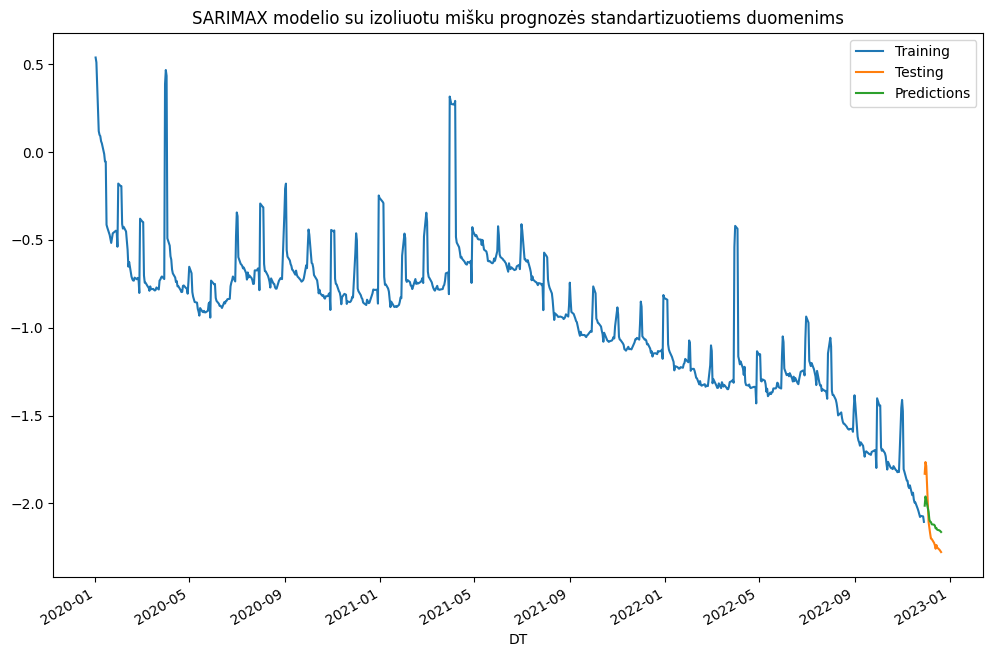

In [ ]:
predictions = pred
import matplotlib.pyplot as plt
training['ANTAL_01'].astype(float)['2020-01-01':].plot(figsize=(12, 8), label='Training')
test['ANTAL_01'].astype(float).plot(label='Testing')
pred.index = test.index
pred.plot(label='Predictions')
plt.title('SARIMAX modelio su izoliuotu mišku prognozės standartizuotiems duomenims')
plt.legend()

In [ ]:
# inverse transform and print the first 5 rows
normalized_predictions = predictions.values.reshape((len(predictions.values), 1))
print(normalized_predictions)
inversed = scaler.inverse_transform(normalized_predictions)
print(inversed)

[[-2.01301068]
 [-1.96058549]
 [-1.98069821]
 [-2.04882549]
 [-2.09235613]
 [-2.10435099]
 [-2.10617249]
 [-2.11880136]
 [-2.12110599]
 [-2.12647942]
 [-2.14224897]
 [-2.1400291 ]
 [-2.14964464]
 [-2.15387184]
 [-2.15766953]
 [-2.16273117]]
[[31343.68906266]
 [31592.73565834]
 [31497.18991388]
 [31173.55031353]
 [30966.75740326]
 [30909.7756408 ]
 [30901.12257999]
 [30841.12895996]
 [30830.18078028]
 [30804.65422175]
 [30729.74078722]
 [30740.28628953]
 [30694.60751878]
 [30674.52616856]
 [30656.48516902]
 [30632.43978335]]
